<a href="https://colab.research.google.com/github/imran9891/TensorFlow/blob/main/Exercise_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network regression with TensorFlow Exercises
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, * * what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [1]:
# Import dependencies
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

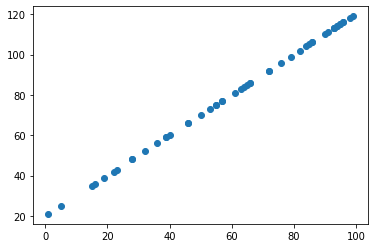

In [2]:
# 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
tf.random.set_seed(42)
X = tf.constant(np.random.randint(1,100,size=50))
y = X + 20
plt.scatter(X,y);

In [3]:
# 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
split = int(0.8*len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(TensorShape([40]), TensorShape([10]), TensorShape([40]), TensorShape([10]))

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Creating a model
model_0 = Sequential([
  layers.Dense(10),
  layers.Dense(10),
  layers.Dense(10),
  layers.Dense(1)
])

# Compile the model
model_0.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

In [5]:
# Fit the model
history_0 = model_0.fit(X_train,
                        y_train,
                        epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 120.9441 - mae: 120.9441
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 97.1276 - mae: 97.1276
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 77.1454 - mae: 77.1454
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 56.5413 - mae: 56.5413
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 34.0856 - mae: 34.0856
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8552 - mae: 10.8552
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 20.0156 - mae: 20.0156
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6061 - mae: 24.6061
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 16.4083 - mae: 16.4083
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 6.9970 - mae: 6.9970
Epoch 11/100
2/2 [==============================] - 0s 13m

In [6]:
# Function for predicting and plotting
def pred_and_plot(model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
  """
  Predicts the output and plots
  """
  pred = model.predict(X_test)
  plt.figure(figsize=(15,10))
  plt.scatter(X_train,y_train,label="Training",marker='x')
  plt.scatter(X_test,y_test,label="Testing")
  plt.scatter(X_test,pred,label="Predictions")
  plt.legend();

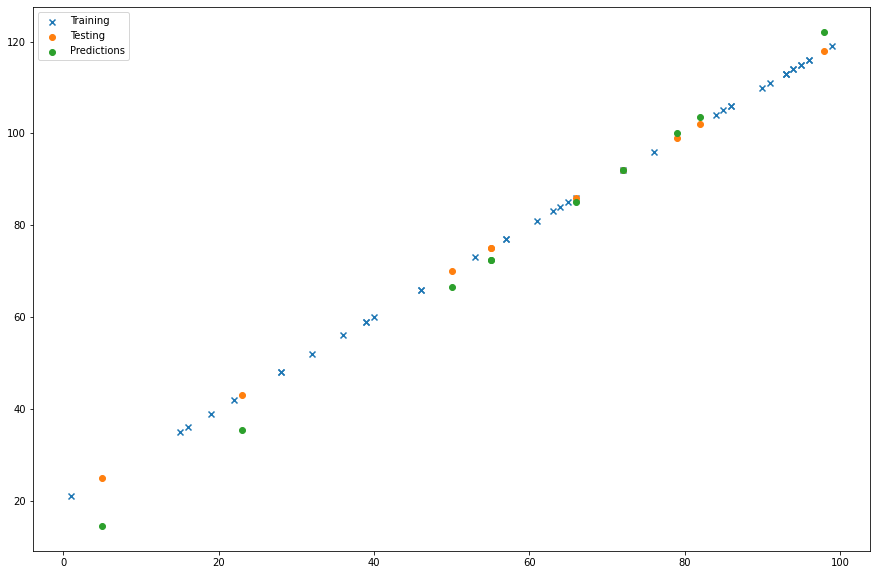

In [7]:
pred_and_plot(model_0)

Our model needs to be improved...

In [8]:
# Creating a model
model_1 = Sequential([
  layers.Dense(10, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(1)
])

# Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

In [9]:
# Fit the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 77.0358 - mae: 77.0358
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 70.8102 - mae: 70.8102
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 64.8297 - mae: 64.8297
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 58.4779 - mae: 58.4779
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 52.1227 - mae: 52.1227
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 45.4977 - mae: 45.4977
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 38.7187 - mae: 38.7187
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 31.6969 - mae: 31.6969
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6550 - mae: 24.6550
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 17.0101 - mae: 17.0101
Epoch 11/500
2/2 [==============================] - 0s 6ms/

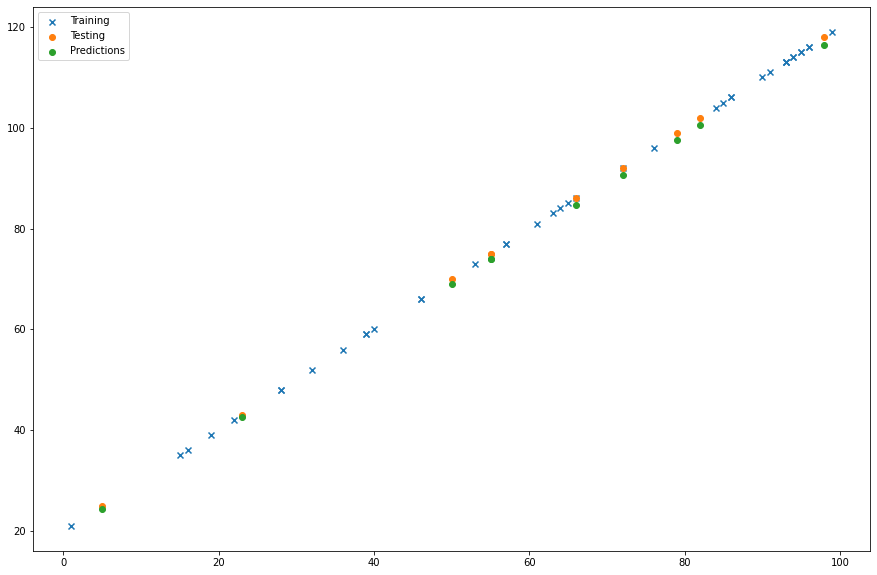

In [10]:
pred_and_plot(model_1)

In [11]:
# 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
# Building a larger model (how does one with 4 dense layers go?).
# Increasing the number of units in each layer.
# Lookup the documentation of Adam and find out what the first parameter is, * * what happens if you increase it by 10x?
# What happens if you train for longer (say 300 epochs instead of 200)?

In [12]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))

X = insurance.drop(["charges"],axis=1)
y = insurance.charges

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [14]:
X_train.head()

,age,sex,bmi,children,smoker,region
1172,56,female,41.910,0,no,southeast
1271,25,female,34.485,0,no,northwest
1277,32,female,29.735,0,no,northwest
285,46,male,26.620,1,no,southeast
1154,48,female,27.930,4,no,northwest


In [15]:
X_train_normal[0]

array([0.82608696, 0.69814366, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [16]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
model = Sequential([
  layers.Dense(100),
  layers.Dense(10),
  layers.Dense(10),
  layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"])

# Fit the model
model.fit(X_train_normal,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 12988.9512 - mae: 12988.9512
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12978.2520 - mae: 12978.2520
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12934.7676 - mae: 12934.7676
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12796.1201 - mae: 12796.1201
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12449.6631 - mae: 12449.6631
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11732.4629 - mae: 11732.4629
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 10563.4639 - mae: 10563.4639
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 9248.0283 - mae: 9248.0283
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8238.5488 - mae: 8238.5488
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7800.7202 - 

In [17]:
# 1. Create the model
model_3 = Sequential([
  layers.Dense(100,activation="relu"),
  layers.Dense(100,activation="relu"),
  layers.Dense(100,activation="relu"),
  layers.Dense(1)
])

# Compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"])

# Fit the model
history_3 = model_3.fit(X_train_normal,y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 5ms/step - loss: 10827.0869 - mae: 10827.0869
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 6638.5034 - mae: 6638.5034
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 3815.9949 - mae: 3815.9949
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 3341.9590 - mae: 3341.9590
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 3281.4111 - mae: 3281.4111
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 3207.9810 - mae: 3207.9810
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 3203.9353 - mae: 3203.9353
Epoch 8/300
34/34 [==============================] - 0s 5ms/step - loss: 3170.1577 - mae: 3170.1577
Epoch 9/300
34/34 [==============================] - 0s 5ms/step - loss: 3161.3955 - mae: 3161.3955
Epoch 10/300
34/34 [==============================] - 0s 4ms/step - loss: 3057.7998 - mae: 3057.79

In [18]:
history_3.history

{'loss': [10827.0869140625,
  6638.50341796875,
  3815.994873046875,
  3341.958984375,
  3281.4111328125,
  3207.98095703125,
  3203.935302734375,
  3170.15771484375,
  3161.3955078125,
  3057.7998046875,
  2961.75048828125,
  2847.343994140625,
  2818.108642578125,
  2671.7265625,
  2558.0322265625,
  2514.454345703125,
  2445.208984375,
  2335.640380859375,
  2175.875732421875,
  2093.47412109375,
  2128.016357421875,
  2028.1263427734375,
  2045.93603515625,
  2030.848876953125,
  2028.6142578125,
  2016.906494140625,
  2005.7843017578125,
  2037.90869140625,
  2005.4205322265625,
  1982.110107421875,
  2060.308837890625,
  2030.1392822265625,
  2030.7177734375,
  2047.7576904296875,
  2050.93017578125,
  2036.6715087890625,
  1955.9761962890625,
  1965.3399658203125,
  1992.7733154296875,
  2006.0367431640625,
  2003.4990234375,
  1941.4779052734375,
  1989.5703125,
  1949.9840087890625,
  1986.6495361328125,
  1971.457275390625,
  2031.1290283203125,
  2005.777587890625,
  1956.57

In [19]:
pd.DataFrame(history_3.history)

,loss,mae
0,10827.086914,10827.086914
1,6638.503418,6638.503418
2,3815.994873,3815.994873
3,3341.958984,3341.958984
4,3281.411133,3281.411133
...,...,...
295,1539.080688,1539.080688
296,1539.987915,1539.987915
297,1475.288330,1475.288330
298,1510.223267,1510.223267


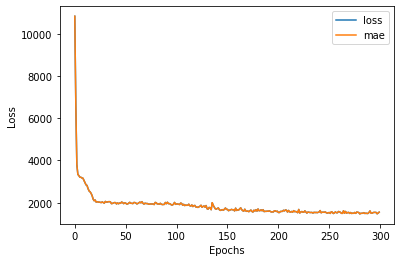

In [20]:
# Let's plot the loss curve Vs Epochs 
pd.DataFrame(history_3.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [21]:
# 4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.
from tensorflow.keras.datasets import boston_housing
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [22]:
# Creating a baseline model
model_b0 = Sequential([
  layers.Dense(1)
])

# Compile the model
model_b0.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
history_model_b0 = model_b0.fit(X_train,
                                y_train,
                                epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 1ms/step - loss: 342.9016 - mae: 342.9016
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 331.1351 - mae: 331.1351
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 319.3456 - mae: 319.3456
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 307.6156 - mae: 307.6156
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 295.7853 - mae: 295.7853
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 284.0426 - mae: 284.0426
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 272.2597 - mae: 272.2597
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 260.5103 - mae: 260.5103
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 248.7391 - mae: 248.7391
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 236.9666 - mae: 236.9666


In [23]:
model_b0.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 237.0156 - mae: 237.0156


[237.01560974121094, 237.01560974121094]

In [24]:
# Trying to improve the model
model_b1 = Sequential([
  layers.Dense(100,activation="relu"),
  layers.Dense(1)
])

# Compile the model
model_b1.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
history_model_b1 = model_b1.fit(X_train,
                                y_train,
                                epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 16.9845 - mae: 16.9845
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 9.2050 - mae: 9.2050
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 6.6552 - mae: 6.6552
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 5.4072 - mae: 5.4072
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 4.8816 - mae: 4.8816
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 4.7779 - mae: 4.7779
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 4.8627 - mae: 4.8627
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 4.7593 - mae: 4.7593
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 4.6923 - mae: 4.6923
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 4.5772 - mae: 4.5772
Epoch 11/100
13/13 [==============================] - 0s 

In [25]:
model_b1.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.1639 - mae: 4.1639


[4.163874626159668, 4.163874626159668]

In [26]:
# Trying to improve the model
model_b2 = Sequential([
  layers.Dense(100,activation="relu"),
  layers.Dense(1)
])

# Compile the model
model_b2.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit the model
history_model_b2 = model_b2.fit(X_train,
                                y_train,
                                epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 29.6584 - mae: 29.6584
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 14.2052 - mae: 14.2052
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 8.5340 - mae: 8.5340
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 6.1455 - mae: 6.1455
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 4.9680 - mae: 4.9680
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 4.9915 - mae: 4.9915
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 7.9309 - mae: 7.9309
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 8.9473 - mae: 8.9473
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 10.9484 - mae: 10.9484
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 8.5040 - mae: 8.5040
Epoch 11/200
13/13 [==============================] -

In [27]:
model_b2.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.7708 - mae: 3.7708


[3.770833969116211, 3.770833969116211]